In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your main image
main_image = cv2.imread('/home/mkhanmhmdi/Pictures/Screenshots/1.png')



In [3]:
main_image.shape

(702, 1135, 3)

In [38]:
mask = np.zeros(shape=main_image.shape)
mask[100:150,500:600,:] =10
mask[500:600,700:800,:] =600
mask = mask.astype(main_image.dtype)


In [39]:
def draw_mask(image, mask_generated):
    masked_image = image.copy()

    # Resize the mask to match the dimensions of the image
    mask_resized = cv2.resize(mask_generated, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Find unique labels in the resized mask
    unique_labels = np.unique(mask_resized)

    # Iterate through each unique label and assign a unique color
    for label in unique_labels:
        if label == 0:  # Skip background label
            continue

        # Generate a random color for each label
        color = np.random.randint(0, 255, size=(3,), dtype=np.uint8)

        # Create a binary mask for the current label
        label_mask = (mask_resized == label).astype(np.uint8)

        # Set the color for the pixels belonging to the current label
        masked_image[label_mask > 0] = color

    masked_image = masked_image.astype(np.uint8)

    # You can adjust the alpha and beta values to control the blending
    return cv2.addWeighted(image, 0.7, masked_image, 0.3, 0)


In [40]:
im = draw_mask(main_image,cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY))

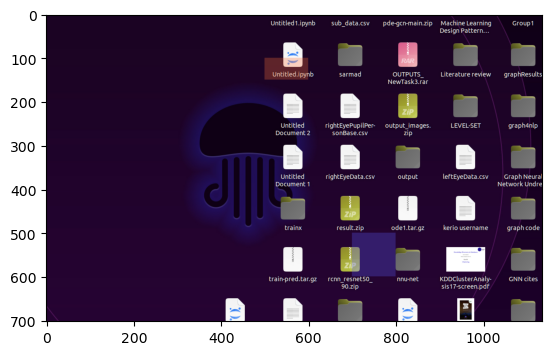

In [41]:
plt.imshow(im)